#### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [1]:
import keras, sklearn, numpy, pandas, matplotlib, tensorflow
keras.backend.backend()

Using TensorFlow backend.


'tensorflow'

In [70]:
# Implementacion de la red

import numpy as np


#def forwardPass():
#    return 0

#k = int(raw_input("Enter output neurons number: "))
#output_classes = list()

   
    
    
# Transfer funct --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
def sigm(x, Derivate=False):
    if not Derivate:
        return 1 / (1.0 + np.exp (-x))
    else:
        out = sigm(x)
        return out * (1.0 - out)

def relu(x, Derivate = False):
    if not Derivate:
        return np.maximum(0, x)
    else:
        return np.greater(x, 0).astype(int)  
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
    
    
class backPropNN:
    """Class defining a NN using Back Propagation"""
    
    # Class Members (internal variables that are accessed with backProNN.member) 
    layerCount = 0
    shape = None
    weights = []
    tFuncs = []
    
    # Class Methods (internal functions that can be called)
    
    def __init__(self, layerSize, layerFunctions = None):
        """Initialise the NN - setup the layers and initial weights"""
        # Layer information
        self.layerCount = len(layerSize) - 1
        self.shape = layerSize
        
        if layerFunctions is None:
            lFuncs = []
            for i in range(self.layerCount):
                if i == self.layerCount - 1 :
                    lFuncs.append(sigm)
                else:
                    lFuncs.append(relu)
        else:
            if len(layerSize) != len(layerFunctions):
                raise ValueError("Revisar cantidad de transfer functions")
            elif layerFunctions[0] is not None:
                raise ValueError("El input layer no puede tener transfer function")
            else:
                lFuncs = layerFunctions[1:] 
            
        self.tFuncs = lFuncs
        
        
        # Data from last run
        self._layerInput = []
        self._layerOutput = []
        self._previousWeightDelta = []
        
        # Weight arrays
        for (l1,l2) in zip(layerSize[:-1], layerSize[1:]):
            self.weights.append(np.random.normal(scale = 0.1, size= (l2,l1+1)))
            self._previousWeightDelta.append(np.zeros(l2, l1+1))
    

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=1)
    
    
    #Run methods (ForwardPass)
    def Run(self, input):
        
        
        # ForwardPass --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
        lnCases = input.shape[0]
        
        # Clear previous intermediate value lists
        self._layerInput = []
        self._layerOutput = []

        # Run
        for index in range(self.layerCount):
            # Determine layer input
            if index == 0:
                layerInput = self.weights[0].dot(np.vstack([input.T,np.ones([1, lnCases])]))
            else:
                layerInput = self.weights[index].dot(np.vstack([self._layerOutput[-1],np.ones([1, lnCases])]))
            
            self._layerInput.append(layerInput)
            self._layerOutput.append(self.tFuncs[index](layerInput))
        
        #print(self._layerOutput[-1].T)
        return self._layerOutput[-1].T
        # --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
        
    
        
        
    # TrainEpoch method
    def backPro(self, input, target, trainingRate = 0.1, momentum = 0.5):
        delta = []
        lnCases = input.shape[0]
        
        #Run the NN
        self.Run(input)
        
        for index in reversed(range(self.layerCount)):
            if index == self.layerCount -1:
                #Compare to target values
                
                #MSE
                output_delta = self._layerOutput[index] - target.T
                error = np.sum(output_delta**2)
                
                delta.append(output_delta * self.tFuncs[index](self._layerInput[index], True))
                
            else:
                #Compare following layer's delta
                delta_pullback = self.weights[index + 1].T.dot(delta[-1])
                
                delta.append(delta_pullback[:-1, :] * self.tFuncs[index](self._layerInput[index], True))
                
        
        #Compute weight deltas
        for index in range(self.layerCount):
            delta_index = self.layerCount - 1 - index
            
            if index == 0:
                layerOutput = np.vstack([input.T, np.ones([1,lnCases])])
            else:
                layerOutput = np.vstack([self._layerOutput[index - 1], np.ones([1,self._layerOutput[index - 1].shape[1]])])
        
            curWeightDelta = np.sum(\
                                 layerOutput[None, :, :].transpose(2, 0, 1) * delta[delta_index][None, :, :].transpose(2, 1, 0)\
                                 , axis = 0)
            
            #Momentum --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
            weightDelta = trainingRate * curWeightDelta + momentum * self._previousWeightDelta[index]
            self._previousWeightDelta[index] = weightDelta
            # --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
            
            self.weights[index] -= weightDelta 
        
        return error
        
    
    

    
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
    
    
    
#bpn = backPropNN((2,32,16,2))


#lvInput = np.array([[2,0],[1,3],[4,-1]])
#lvTarget = np.array([[0.1,0.2],[0.15,0.35],[0.02,0.78]])

#print(lvInput)
#print(lvTarget)

#lvInput = np.array([[0,0], [1,1], [0, 1], [1, 0]])
#lvTarget =np.array([[0.05], [0.05], [0.95], [0.95]])
    

#lFuncs = [None, relu, relu, sigm]
#bpn = backPropNN((3,32,16,3), lFuncs)


lnMax = 100000
lnErr = 1e-5

#for i in range(lnMax+1):
#    err = bpn.backPro(lvInput, lvTarget)
    
#    if i % 10000 == 0:
#        print("iteration {0}\tError: {1:0.10f}".format(i, err))
        
#    if err <= lnErr:
#        print("Minimum error reachet at iteration: {0}".format(i))
#        break

#Display output
#lvOutput = bpn.Run(lvInput)

#print("Input: {0} \nOutput: {1}".format(lvInput, lvOutput))

#print(softmax(lvOutput))

#print(np.argmax(softmax(lvOutput), axis=1))




In [66]:
# setea el numero mayor de un array a 1 y los demas a 0 (se usa para el output de la red)

def n_largest_setarr(a, n=1):
    # a : Input array
    # n : We want n-max element position to be set to 1
    out = np.zeros_like(a)
    out[np.arange(len(a)), np.argpartition(a,-n, axis=1)[:,-n]] = 1
    return out

In [58]:
# Se corre la red sin momentum para encontrar el error y el tiempo por cada epoch.

import time

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
x_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
#transform target to one hot vector
import keras

#target
y_onehot = keras.utils.to_categorical(y_train)


#define NN
lFuncs = [None, relu, relu, sigm]
bpn = backPropNN((4,32,16,3), lFuncs)

epochs = 1000
numEpochs = range(epochs)

lerror = []
lepochTime = []

for i in range(epochs):
    startEpochTime = time.time()
    error = bpn.backPro(x_train ,y_onehot)
    endEpochTime = time.time()
    
    lerror.append(error)
    lepochTime.append(endEpochTime - startEpochTime)


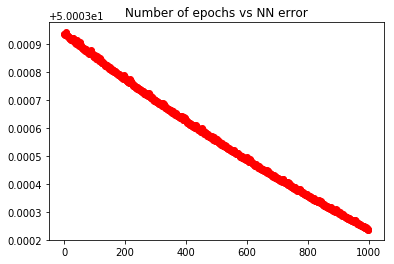

Printing epoch time every 100.0 epochs
Epoch time at 0th epoch: 	0.002588033676147461
Epoch time at 100th epoch: 	0.0009891986846923828
Epoch time at 200th epoch: 	0.0009911060333251953
Epoch time at 300th epoch: 	0.001035928726196289
Epoch time at 400th epoch: 	0.0009918212890625
Epoch time at 500th epoch: 	0.0014951229095458984
Epoch time at 600th epoch: 	0.002778768539428711
Epoch time at 700th epoch: 	0.0009930133819580078
Epoch time at 800th epoch: 	0.0016047954559326172
Epoch time at 900th epoch: 	0.001856088638305664


In [59]:
#Graficar los resultados anteriores

import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(numEpochs, lerror, 'ro')
plt.title("Number of epochs vs NN error")
#plt.yscale('symlog', linthreshy=0.01)
#plt.yscale('log')
plt.show()


aux=epochs/10
print("Printing epoch time every {0} epochs".format(aux))
for i in range(epochs):
    if i%aux == 0:
        print("Epoch time at {0}th epoch: \t{1}".format(i, lepochTime[i]))


In [68]:
# Se corre la red sin momentum para un input random, se muestra la matriz de confusion de sklearn

from sklearn.metrics import confusion_matrix

chosen = random.randint(0,149)
print("Input: {0}\t".format(chosen))
chosenOutput = n_largest_setarr(bpn.Run(np.array([x_train[chosen]])))
print("Predicted Output: {0}\t".format(chosenOutput))
print("Target Output: {0}\t".format(y_onehot[chosen]))


confusion_matrix(y_onehot[chosen], chosenOutput[0])

Input: 84	
Predicted Output: [[0. 1. 0.]]	
Target Output: [0. 1. 0.]	


array([[2, 0],
       [0, 1]])

In [69]:
# Se corre la red en keras

from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax"))
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])


model.fit(x_train, y_onehot, epochs=epochs, batch_size=1, verbose=1)


#Falta graficar lo mismo que arriba

Epoch 1/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.1036 - acc: 0.7533
Epoch 2/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0470 - acc: 0.9667
Epoch 3/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0306 - acc: 0.9467
Epoch 4/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0250 - acc: 0.9600
Epoch 5/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0192 - acc: 0.9667
Epoch 6/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0168 - acc: 0.9733
Epoch 7/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0196 - acc: 0.9533
Epoch 8/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0146 - acc: 0.9733
Epoch 9/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0119 - acc: 0.9800
Epoch 10/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0185 - acc: 0.9600
Epoch 11/1000
150/150 [======

150/150 [==============================] - 0s 2ms/step - loss: 0.0064 - acc: 0.9867
Epoch 85/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0060 - acc: 0.9933
Epoch 86/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0074 - acc: 0.9867
Epoch 87/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0060 - acc: 0.9933
Epoch 88/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0048 - acc: 0.9933
Epoch 89/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0123 - acc: 0.9733
Epoch 90/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0081 - acc: 0.9867
Epoch 91/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0058 - acc: 0.9933
Epoch 92/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0051 - acc: 0.9933
Epoch 93/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0055 - acc: 0.9933
Epoch 94/1000
150/150 [===========

150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 167/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.9933
Epoch 168/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 169/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 170/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 171/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 172/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 173/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 174/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 175/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 176/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 249/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 250/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 251/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 252/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 253/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 254/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 255/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 256/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 257/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 258/1000
150/150 [=

150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 331/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 332/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 333/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 334/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 335/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 336/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 337/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 338/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 339/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 340/1000
150/150 [=

150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 413/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 414/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 415/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 416/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 417/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 418/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 419/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 420/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 421/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 422/1000
150/150 [=

150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 495/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 496/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 497/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 498/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 499/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 500/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 501/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 502/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 503/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 504/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 577/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 578/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 579/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 580/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 581/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 582/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 583/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 584/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 585/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 586/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 659/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 660/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 661/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 662/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 663/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 664/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 665/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 666/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 667/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 668/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 741/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 742/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 743/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 744/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 745/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 746/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 747/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 748/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 749/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 750/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 823/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 824/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 825/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 826/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 827/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 828/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 829/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 830/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 831/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 832/1000
150/150 [=

150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 905/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 906/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 907/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 908/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 909/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 910/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 911/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 912/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 913/1000
150/150 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9933
Epoch 914/1000
150/150 [=

150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 987/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 988/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 989/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 990/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 991/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 992/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 993/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.0045 - acc: 0.9933
Epoch 994/1000
150/150 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9933
Epoch 995/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 0.9933
Epoch 996/1000
150/150 [=

In [74]:
# Se corre la red con momentum implementado

lerror = []
lepochTime = []

for i in range(epochs):
    startEpochTime = time.time()
    error = bpn.backPro(x_train ,y_onehot)
    endEpochTime = time.time()
    
    lerror.append(error)
    lepochTime.append(endEpochTime - startEpochTime)

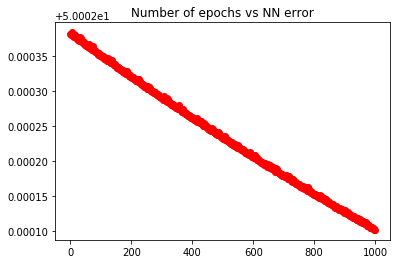

Printing epoch time every 100.0 epochs
Epoch time at 0th epoch: 	0.0028553009033203125
Epoch time at 100th epoch: 	0.0014889240264892578
Epoch time at 200th epoch: 	0.0010068416595458984
Epoch time at 300th epoch: 	0.0011048316955566406
Epoch time at 400th epoch: 	0.001178741455078125
Epoch time at 500th epoch: 	0.001088857650756836
Epoch time at 600th epoch: 	0.001013040542602539
Epoch time at 700th epoch: 	0.0010991096496582031
Epoch time at 800th epoch: 	0.0015590190887451172
Epoch time at 900th epoch: 	0.0010061264038085938


In [75]:
# Graficar los resultados con momentum implementado

plt.plot(numEpochs, lerror, 'ro')
plt.title("Number of epochs vs NN error")
#plt.yscale('symlog', linthreshy=0.01)
#plt.yscale('log')
plt.show()


aux=epochs/10
print("Printing epoch time every {0} epochs".format(aux))
for i in range(epochs):
    if i%aux == 0:
        print("Epoch time at {0}th epoch: \t{1}".format(i, lepochTime[i]))